In [24]:
#
# libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

In [25]:
#
# load the Galton family height data
#
galton_heights = pd.read_csv('Datasets/galton.csv')
galton_heights.head()

,ht_father,ht_child
0,78.5,73.2
1,78.5,69.2
2,78.5,69.0
3,78.5,69.0
4,75.5,73.5


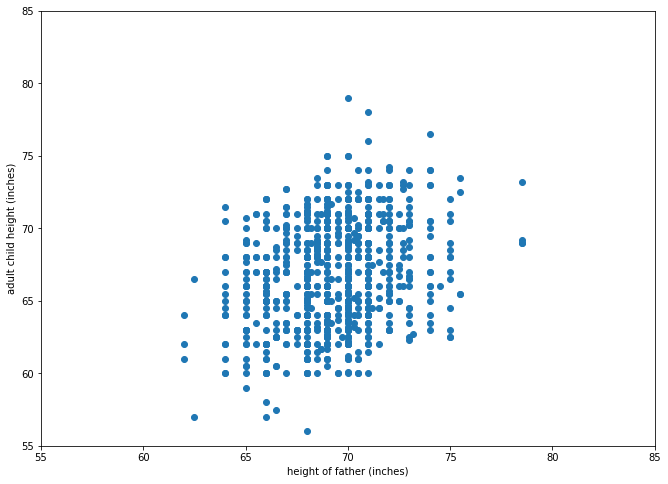

In [26]:
#
# plot the data
#
fig, ax = plt.subplots(figsize = (11, 8))
ax.scatter(galton_heights.ht_father, 
           galton_heights.ht_child)
ax.set_xlabel('height of father (inches)')
ax.set_ylabel('adult child height (inches)')
ax.set_xlim(55, 85)
ax.set_ylim(55, 85)
plt.show()

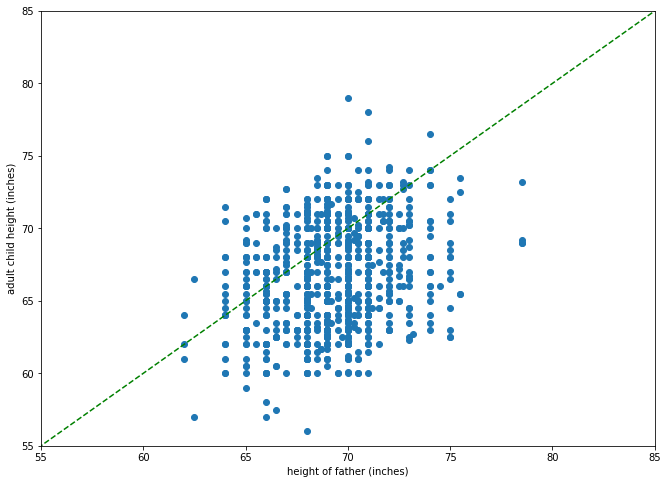

In [27]:
#
# add a line with slope = 1, intercept = 0 (diagonal)
#
fig, ax = plt.subplots(figsize = (11, 8))
ax.scatter(galton_heights.ht_father, 
           galton_heights.ht_child)
ax.plot([0, 100], [0, 100], color = 'green', linestyle = '--')
ax.set_xlabel('height of father (inches)')
ax.set_ylabel('adult child height (inches)')
ax.set_xlim(55, 85)
ax.set_ylim(55, 85)
plt.show()

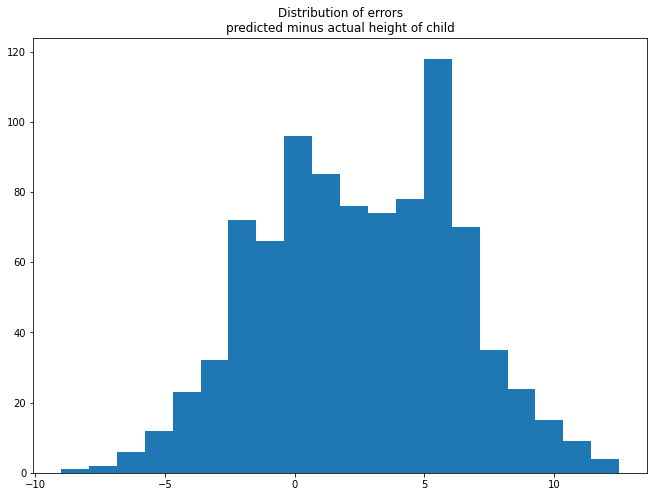

In [28]:
galton_heights['naive_pred'] = galton_heights['ht_father']
naive_res = galton_heights['naive_pred'] - galton_heights['ht_child']
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(naive_res, bins = 20)
ax.set_title('Distribution of errors\npredicted minus actual height of child')
plt.show()

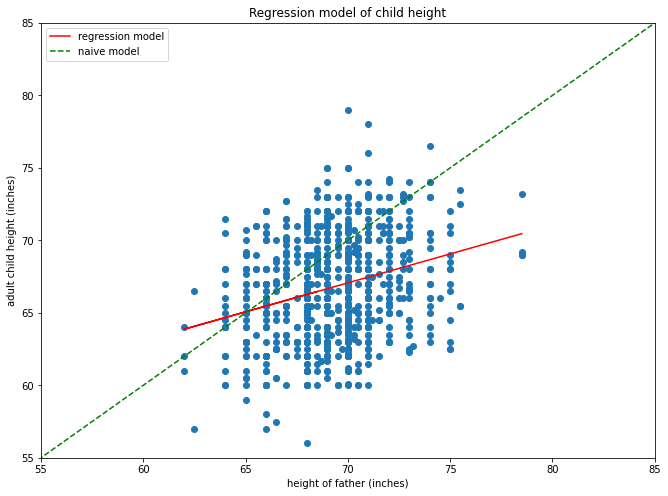

In [29]:
#
# fit a least squares model to the data
#
linear_model = OLS()
linear_model.fit(np.array(galton_heights.ht_father).reshape(-1, 1), 
                 np.array(galton_heights.ht_child).reshape(-1, 1))
intercept = linear_model.intercept_[0]
slope = linear_model.coef_[0][0]
fig, ax = plt.subplots(figsize = (11, 8))
ax.scatter(galton_heights.ht_father,
           galton_heights.ht_child)
ax.plot(galton_heights.ht_father,
        galton_heights.ht_father * slope + intercept,
        color = 'red',
        label = 'regression model')
ax.plot([0, 100], [0, 100], color = 'green', 
        linestyle = '--', label = 'naive model')
ax.set_title('Regression model of child height')
ax.set_xlabel('height of father (inches)')
ax.set_ylabel('adult child height (inches)')
ax.set_xlim(55, 85)
ax.set_ylim(55, 85)
ax.legend()
plt.show()

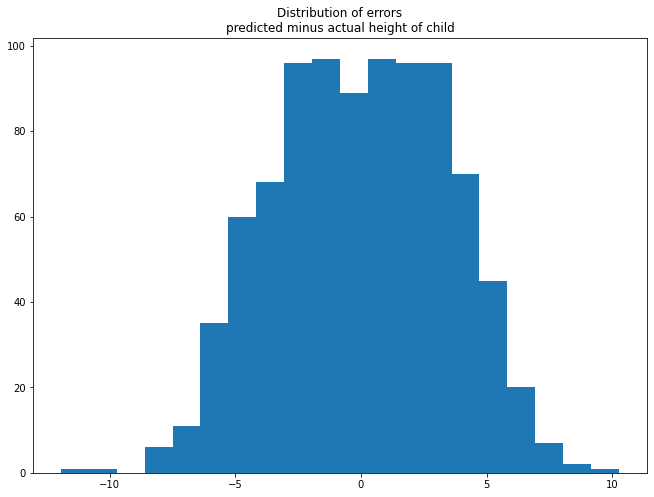

In [30]:
galton_heights['OLS_pred'] = \
    linear_model.predict(np.array(galton_heights.ht_father).reshape(-1, 1))
OLS_res = galton_heights['OLS_pred'] - galton_heights['ht_child']
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(OLS_res, bins = 20)
ax.set_title('Distribution of errors\npredicted minus actual height of child')
plt.show()

In [31]:
naive_SSE = np.sum((galton_heights.naive_pred - galton_heights.ht_child)**2)
OLS_SSE = np.sum((galton_heights.OLS_pred - galton_heights.ht_child)**2)
naive_RMSE = np.sqrt(naive_SSE / galton_heights.shape[0])
OLS_RMSE = np.sqrt(OLS_SSE / galton_heights.shape[0])
print('naive model gives:\n',
      'SSE = ', naive_SSE.round(3), '\n',
      'RMSE = ', naive_RMSE.round(3), '\n',
      'regression model gives:\n',
      'SSE = ', OLS_SSE.round(3), '\n',
      'RMSE = ', OLS_RMSE.round(3))

naive model gives:
 SSE =  18104.76 
 RMSE =  4.49 
 regression model gives:
 SSE =  10641.987 
 RMSE =  3.442


In [32]:
#
# make a utility function to plot pair-wise scatter plots on a grid
#
def plot_corr_grid(df, variables):
    n_cols = len(variables) - 1
    n_rows = n_cols
    fig = plt.figure(figsize = (18, 16))
    for i in range(n_rows):
        for j in range(i):
            ax = fig.add_subplot(n_rows, n_cols, (i) * n_cols + j + 1)
            df.plot.scatter(ax = ax, x = variables[i], y = variables[j])
            ax.set_title(variables[i] + ' vs. ' + variables[j])
    fig.tight_layout()
    plt.show()

c:\users\bbate\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():


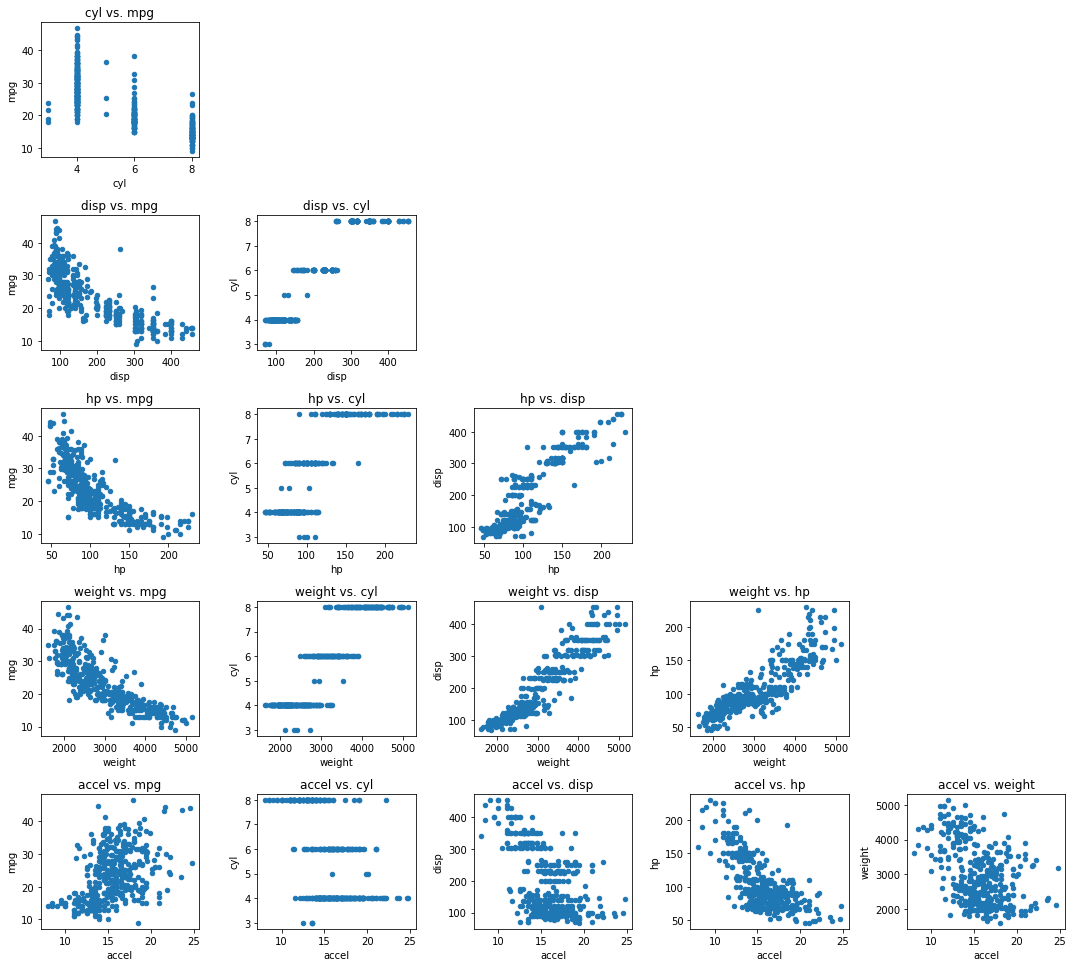

In [33]:
my_data = pd.read_csv('datasets/auto-mpg.data.csv')
plot_corr_grid(my_data, variables = list(my_data.columns)[:-1])

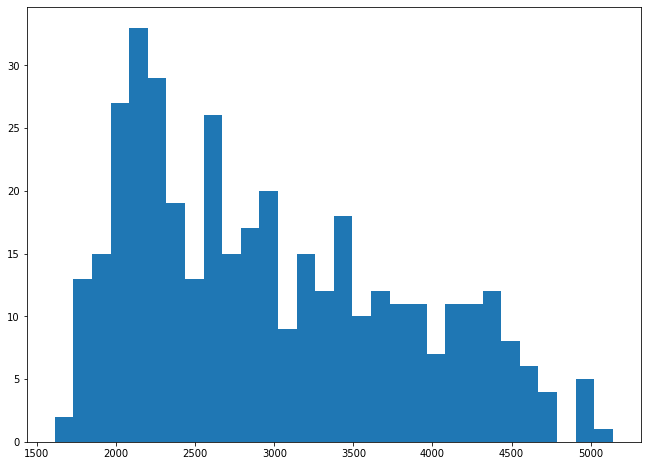

In [34]:
#
# weight vs. mpg is non-linear
# inspect the distribution of weight
#
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(my_data.weight, bins = 30)
plt.show()

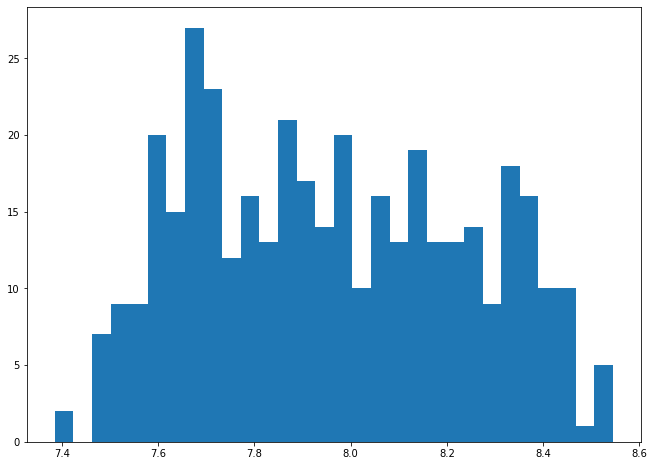

In [35]:
#
# inspect the distribution of log(weight)
#
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(np.log(my_data.weight), bins = 30)
plt.show()

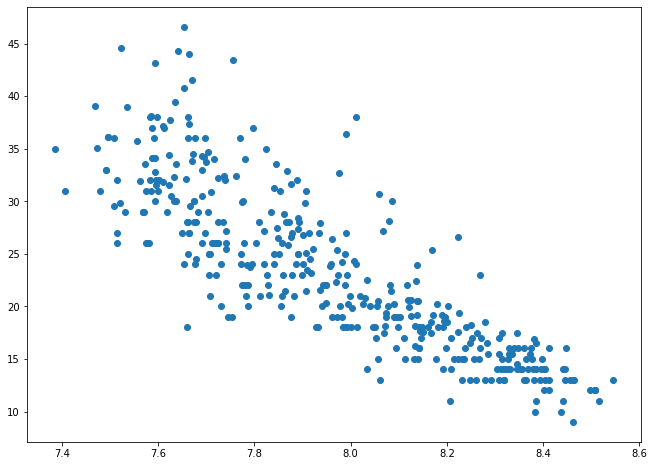

In [36]:
#
# see if log(weight) vs. mpg is more linear
#
fig, ax = plt.subplots(figsize = (11, 8))
ax.scatter(np.log(my_data.weight), my_data.mpg)
plt.show()

In [37]:
np.random.seed(42)
train = np.random.choice(my_data.shape[0], 
                         int(0.7 * my_data.shape[0]),
                         replace = False)
validation = [i for i in range(my_data.shape[0]) if i not in train]
X = my_data.iloc[train, 1:-1]
X['disp'] = np.log(X['disp'])
X['hp'] = np.log(X['hp'])
X['weight'] = np.log(X['weight'])
log_scaler = StandardScaler()
X_log = log_scaler.fit_transform(X)
y = my_data.loc[train, 'mpg']
log_lin_model = OLS()
my_model = log_lin_model.fit(X_log, y)
print('R2 score is ', my_model.score(X_log, y))
print('model coefficients:\n', my_model.coef_, 
      '\nintercept: ', my_model.intercept_)
RMSE = mean_squared_error(y, my_model.predict(X_log), squared = False)
print('the root mean square error is ', RMSE)

R2 score is  0.8259169101408546
model coefficients:
 [ 1.02477193 -1.50441625 -2.06014001 -3.61709086 -0.49864781  2.81397581] 
intercept:  23.34270072992701
the root mean square error is  3.298247031404574


In [38]:
RF_model = RandomForestRegressor(random_state = 42)
X = my_data.iloc[train, 1:-1]
y = my_data.loc[train, 'mpg']
my_RF_model = RF_model.fit(X, y)
print('R2 score is ', my_RF_model.score(X, y))
RMSE = mean_squared_error(y, my_RF_model.predict(X), squared = False)
print('the root mean square error is ', RMSE)

R2 score is  0.9790825512446402
the root mean square error is  1.143297473599363


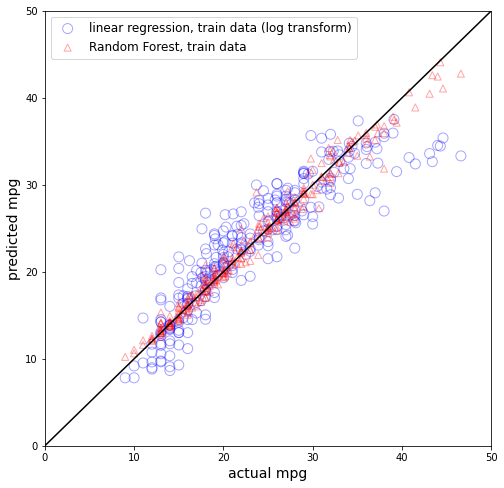

In [39]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(y, my_model.predict(X_log),
           marker = 'o', s = 100, 
           alpha = 0.35, facecolor = 'None', color = 'blue',
           label = 'linear regression, train data (log transform)')
ax.scatter(y, my_RF_model.predict(X),
           marker = '^', s = 50,     
           alpha = 0.35, facecolor = 'None', color = 'red',
           label = 'Random Forest, train data')
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.plot([0, 50], [0, 50], color = 'black')
ax.set_xlabel('actual mpg', fontsize = 14)
ax.set_ylabel('predicted mpg', fontsize = 14)
ax.legend(fontsize = 12)
plt.show()

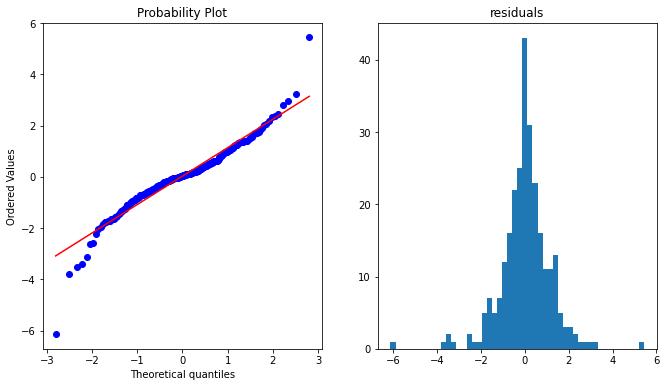

In [40]:
residuals = my_RF_model.predict(X) - y
fig, ax = plt.subplots(1, 2, figsize = (11, 6))
probplot(residuals, plot = ax[0])
ax[1].hist(residuals, bins = 50)
ax[1].set_title('residuals')
plt.show()

In [55]:
X_val = my_data.iloc[validation, 1:-1]
y_val = my_data.loc[validation, 'mpg']
val_pred = my_RF_model.predict(X_val)
val_RMSE = mean_squared_error(val_pred, y_val, squared = False)
print('the validation RMSE is ', val_RMSE)

the validation RMSE is  2.2932374329163605


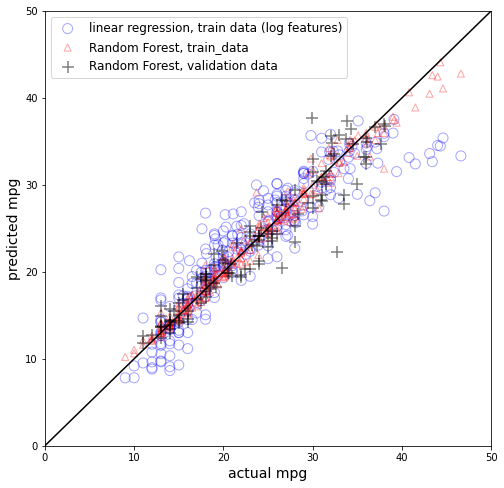

In [56]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(y, my_model.predict(X_log),
           label = 'linear regression, train data (log features)',
           marker = 'o', s = 100, 
           alpha = 0.35, facecolor = 'None', color = 'blue')
ax.scatter(y, my_RF_model.predict(X),
           label = 'Random Forest, train_data',
           marker = '^', s = 50, 
           alpha = 0.35, facecolor = 'None', color = 'red')
ax.scatter(y_val, my_RF_model.predict(X_val),
           label = 'Random Forest, validation data', 
           marker = '+', s = 125, 
           alpha = 0.5, color = 'black')
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.plot([0, 50], [0, 50], color = 'black')
ax.set_xlabel('actual mpg', fontsize = 14)
ax.set_ylabel('predicted mpg', fontsize = 14)
ax.legend(fontsize = 12)
plt.show()

In [108]:
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.model_selection import PredefinedSplit
import pprint
#
# this sets up a fixed validation set for the grid search
#
my_val_index = [-1 if i in validation else 0 for i in my_data.index]
my_val = PredefinedSplit(test_fold = my_val_index)

X_grid = my_data.iloc[:, 1:-1]
y_grid = my_data.loc[:, 'mpg']
#
# search over these parameter values
#
RF_grid = {'n_estimators': [900, 1100, 1300], 
           'criterion' : ['mae', 'mse'],
           'min_samples_leaf' : [1, 2, 3],
           'max_features' : [2, 3, 4], 
           'max_depth' : [15, 17, 19], 
           'min_samples_split' : [2, 3, 4]}
#
# perform the grid search
#
best_model = GSCV(RandomForestRegressor(random_state = 42), 
                  param_grid = RF_grid,
                  cv = my_val,
                  verbose = 1,
                  n_jobs = -1).fit(X_grid, y_grid)
print('best model:')
pprint.pprint(best_model.best_params_)
print(mean_squared_error(best_model.predict(X_val), y_val, squared = False))

Fitting 1 folds for each of 486 candidates, totalling 486 fits
best model:
{'criterion': 'mse',
 'max_depth': 15,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 900}
1.1678655741624786


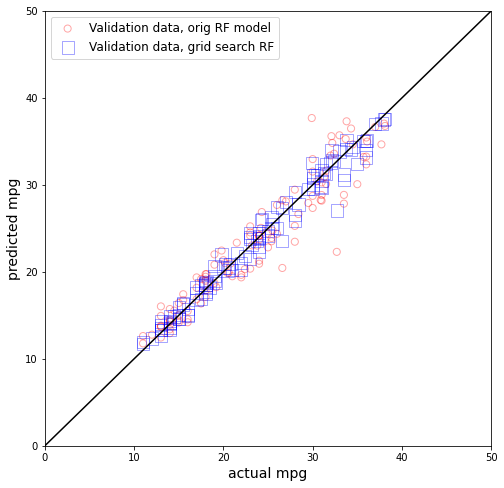

In [111]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(y_val, my_RF_model.predict(X_val), 
           marker = 'o', s = 50, 
           alpha = 0.35, facecolor = 'None', color = 'red',
           label = 'Validation data, orig RF model')
ax.scatter(y_val, best_model.predict(X_val), 
           marker = 's', s = 150, 
           alpha = 0.35, facecolor = 'None', color = 'blue',           
           label = 'Validation data, grid search RF')
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.plot([0, 50], [0, 50], color = 'black')
ax.set_xlabel('actual mpg', fontsize = 14)
ax.set_ylabel('predicted mpg', fontsize = 14)
ax.legend(fontsize = 12)
plt.show()